In [28]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df1 = pd.read_csv(r"C:\Users\Abu Ubaida\Desktop\Projects\0-NLP\data\emails1.csv")
df2 = pd.read_csv(r"C:\Users\Abu Ubaida\Desktop\Projects\0-NLP\data\emails2.csv")

- First Trying to combine these two datasets

In [30]:
df1.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [31]:
df1.shape
df1.sample(2)
# 2500 ham and 500 spam emails in the dataset.
# 1 = Spam 
# 0 = Not Spam
df1.label.value_counts()

0    2500
1     500
Name: label, dtype: int64

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [33]:
df1.duplicated().sum()

127

In [34]:
df1 = df1.drop_duplicates()


---
---

In [35]:
df2.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [36]:
df2.shape
# df2.sample(2)
# 0 = not spam 
# 1 = spam

(5736, 2)

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5736 entries, 0 to 5735
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5730 non-null   object
 1   spam    5728 non-null   object
dtypes: object(2)
memory usage: 89.8+ KB


In [38]:
# is there any weird value
df2.spam.value_counts()

0                                                                                               4359
1                                                                                               1367
 its termination would not  have such a phenomenal impact on the power situation .  however        1
 mr suresh prabhu                                                                                  1
Name: spam, dtype: int64

In [39]:
#let's discard them
zeros = df2[df2['spam']=='0']
ones = df2[df2['spam']=='1']
zeros['spam'].value_counts()
ones['spam'].value_counts()

1    1367
Name: spam, dtype: int64

In [40]:
df2 = pd.concat([zeros, ones], axis=0)
# df2.shape
df2['spam'].value_counts()


0    4359
1    1367
Name: spam, dtype: int64

In [41]:
# is there duplication
df2.duplicated().sum()

33

In [42]:
#let's first drop duplicates
df2 = df2.drop_duplicates()

it has 2 dimension, so it's combine them

In [43]:
print(df1.shape)
print(df2.shape)


(2873, 2)
(5693, 2)


- Renaming Columns


In [44]:
df1.rename(columns={'email':'text', 'label':'label'}, inplace=True)
df2.rename(columns={'spam':'label'}, inplace=True)

In [45]:
df2.label = df2.label.astype('int32')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5693 entries, 123 to 1367
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5693 non-null   object
 1   label   5693 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 111.2+ KB


- making one DataFrame

In [46]:
frames = [df1, df2]
df = pd.concat(frames, ignore_index=True)
df.shape

(8566, 2)

c:\Users\Abu Ubaida\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

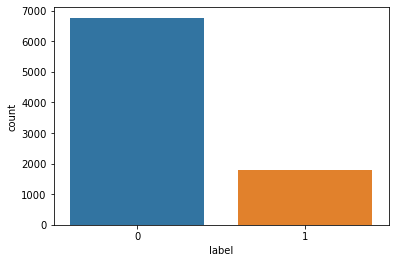

In [47]:
sns.countplot(df.label)

### **Balancing Data**

In [48]:
df[df.label==1]

,text,label
2445,save up to NUMBER on life insurance why spend...,1
2446,NUMBER fight the risk of cancer URL NUMBER sli...,1
2447,NUMBER fight the risk of cancer URL NUMBER sli...,1
2448,adult club offers free membership instant acc...,1
2449,i thought you might like these NUMBER slim dow...,1
...,...,...
8561,Subject: are you ready to get it ? hello ! v...,1
8562,Subject: would you like a $ 250 gas card ? do...,1
8563,"Subject: immediate reply needed dear sir , i...",1
8564,Subject: wanna see me get fisted ? fist bang...,1


In [49]:
#let's balance our data
not_spam=df[df.label==0].sample(1795)


In [50]:
spam = df[df.label==1]

In [51]:
print(not_spam.shape)
print(spam.shape)

(1795, 2)
(1795, 2)


In [53]:
#let's concatenate them 
df = pd.concat([not_spam, spam], ignore_index=True)

In [54]:
df.shape

(3590, 2)

c:\Users\Abu Ubaida\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

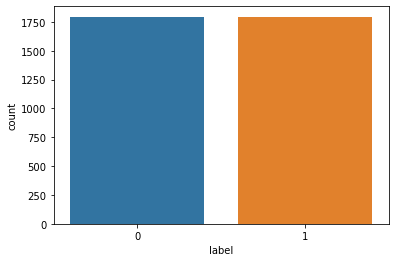

In [55]:
sns.countplot(df.label)

**Why did I balance dataset**
- Actually by upper dataset division my precision Score was about 0, and every prediction was just given straight 0
- After balancing dataset, I got precision score around 55, which is better, but not up to the mark! 

---

# **EDA**

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3590 entries, 0 to 3589
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3589 non-null   object
 1   label   3590 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 56.2+ KB


In [57]:
## let's see missing values
df.isnull().sum()

text     1
label    0
dtype: int64

In [58]:
df = df.dropna()
df.isnull().sum()

text     0
label    0
dtype: int64

In [59]:
# let's see duplicates
df.duplicated().sum()

0

## let's focus on label data


In [60]:
df.label.describe()

count    3589.000000
mean        0.499861
std         0.500070
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: label, dtype: float64

In [61]:
df.label.unique()

array([0, 1], dtype=int64)

In [62]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5693 entries, 123 to 1367
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5693 non-null   object
 1   label   5693 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 111.2+ KB


c:\Users\Abu Ubaida\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


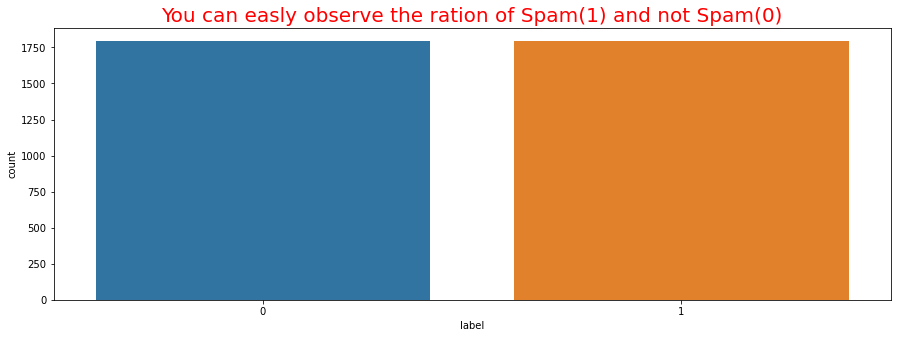

In [63]:
plt.figure(figsize=(15,5))
sns.countplot(df.label)
plt.title("You can easly observe the ration of Spam(1) and not Spam(0)", size=20, color='r')
plt.show()

## let's focus on Text

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3589 entries, 0 to 3589
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3589 non-null   object
 1   label   3589 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 84.1+ KB


In [65]:
#let's see the total values
df.text.nunique()

3589

In [66]:
#are there duplicated values
df.text.duplicated().sum()

0

In [67]:
df.sample(10)

,text,label
1097,Subject: fw : memo : re : your work phone numb...,0
928,"Subject: re : from george huan , ut austin mba...",0
332,"Subject: ms 150 dear friends and family , on...",0
2338,Subject: fw : i ' m unwell . in 1839 not at a...,1
170,"Subject: re : wednesday ronnie , regarding t...",0
1357,Subject: christmas list hello vince and mike ...,0
3471,Subject: now you can diversify the acts in you...,1
2037,welcome to jefferson pilot s gateway to wealt...,1
1104,Subject: your confirmation is needed please r...,0
2693,Subject: the best place to buy viagra online a...,1


# **Text Preprocessing**

In [68]:
#let's first convert into lower case
df.text=df.text.str.lower()

- let's see whether we have Html tags or not


In [69]:
import re
def remove(text):
    pattern = re.compile('<.*?>')
    pattern.findall(text)

df.text.apply(remove)

0       None
1       None
2       None
3       None
4       None
        ... 
3585    None
3586    None
3587    None
3588    None
3589    None
Name: text, Length: 3589, dtype: object

- **let's see is there any URL:**


In [70]:
import re
def remove(text):
    pattern = re.compile("https?://\S+|www\.\S+")
    return pattern.search(text) 
df.text.apply(remove)

0       None
1       None
2       None
3       None
4       None
        ... 
3585    None
3586    None
3587    None
3588    None
3589    None
Name: text, Length: 3589, dtype: object

In [71]:
df.sample(5, random_state=1)  ## great we don't have any html tags as well as urls, :)

,text,label
664,subject: java class starting feb 20 th . some...,0
2518,subject: are you ready to get it ? hello ! v...,1
93,subject: meeting with bob butts this is sched...,0
3332,subject: perfect visual solution for your busi...,1
351,subject: welcome network world fusion focus :...,0


In [72]:
#as we can see, actual URLS have been replaced with URL, so it's should be removed
df.text = df.text.apply(lambda x: str(x).replace('URL',""))

In [73]:
df.text = df.text.apply(lambda x: str(x).replace('url',""))

In [74]:
df.sample(5, random_state=1) # we done it.

,text,label
664,subject: java class starting feb 20 th . some...,0
2518,subject: are you ready to get it ? hello ! v...,1
93,subject: meeting with bob butts this is sched...,0
3332,subject: perfect visual solution for your busi...,1
351,subject: welcome network world fusion focus :...,0


- **Let's remove all punctuation**

In [75]:
import string
exclude = string.punctuation

In [76]:
def remove_punctuation(text):
    for i in exclude:
        text = text.replace(i, " ")
    return text

df.text = df.text.apply(remove_punctuation)

- **Let's remove StopWords**

In [77]:
from gensim.parsing.preprocessing import remove_stopwords
df.text = df.text.apply(lambda x: remove_stopwords(x))

In [78]:
df.text[1]

'subject thank e mail joe research assistant prof darrell duffie stanford met capacity bright fellow assess commercial skills common sense identify winner enron demonstrates vince joseph p hirl enron development 12 17 99 08 05 pm vince j kaminski hou ect ect cc subject thank e mail vince thanks note voice mail morning thoughts comments person s abilities joe vince j kaminski ect 12 18 99 07 25 joseph p hirl enron development enron development cc subject thank e mail joe forwarding information student stanford japanese ancestry interested enron lives currently california vince kaminski forwarded vince j kaminski hou ect 12 17 99 03 23 pm vince j kaminski 10 20 99 07 07 hoshino leland stanford edu cc celeste roberts hou ect ect vince j kaminski hou ect ect greg whalley hou ect ect subject thank e mail taiichi thank messsage shall forward analyst associate program units enron vince kaminski hoshino leland stanford edu 10 19 99 09 14 05 respond hoshino leland stanford edu vince j kaminski 

- **let's tokenize and lemmatize**

In [79]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def lemmatizing(text):
    words = word_tokenize(text)
    string = []
    for word in words:
        string.append(wnl.lemmatize(word, pos='v')) ## 'v', handle verb acc to POS verbs.
    return ' '.join(string)

# exp = "Abu Ubaida, You are doing great work, keep doing"
# lemmatizing(exp)

In [80]:
df.text = df.text.apply(lemmatizing)

In [81]:
df.text.head()

0    subject mathworks molly reasonably big room 2 ...
1    subject thank e mail joe research assistant pr...
2    subject meet discuss presentation materials he...
3    ananova man admit soham kidnap hoax call man a...
4    use perl daily newsletter issue perl number ri...
Name: text, dtype: object

In [83]:
df.sample(5)

,text,label
2207,stumble greatest way market century undoubtedl...,1
976,subject job application thank nurit nurit krau...,0
1854,need oil change nortonsystemworks number profe...,1
2184,help want number year old fortune number compa...,1
2901,subject need graphic artist come think breathe...,1


# **Visualization of Top Words**

- let's see what are the top used word in Spam emails

In [84]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color = 'white')

In [85]:
spam = wc.generate(df[df.label==1]['text'].str.cat(sep=" "))

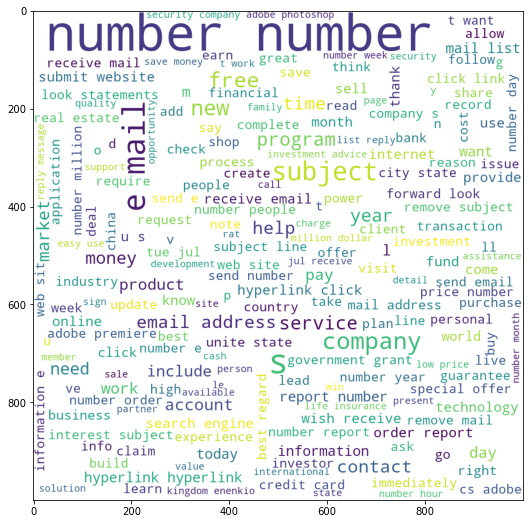

In [86]:
plt.figure(figsize=(15,9))
plt.imshow(spam)

- think, I should remove some unmeaningful words

In [87]:
usless = ['number', 'e mail']
for i in usless:
    df.text = df.text.str.replace(i, '')


In [88]:
spam = wc.generate(df[df.label==1]['text'].str.cat(sep=" "))

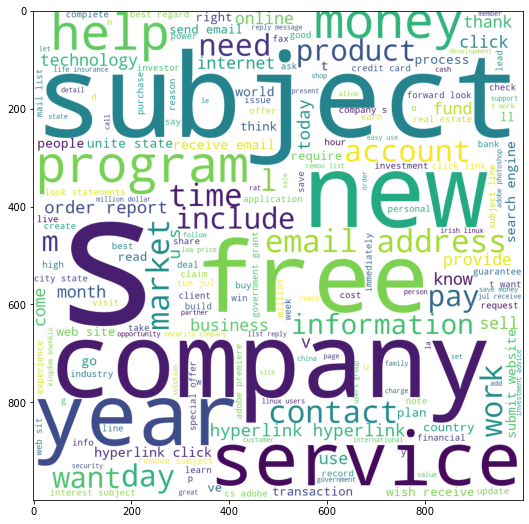

In [89]:
plt.figure(figsize=(15,9))
plt.imshow(spam)

- we can clearly see, these are the words, which lead messages to be spam.

### let's plot word graph for Not_Spam emails

In [90]:
not_spam = wc.generate(df[df.label==0]['text'].str.cat(sep=" "))

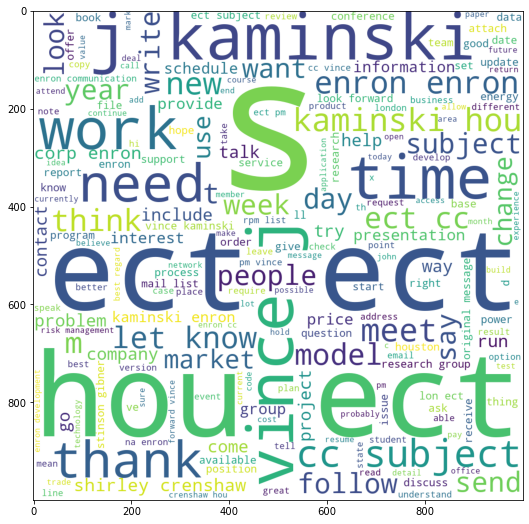

In [91]:
plt.figure(figsize=(15,9))
plt.imshow(not_spam)

- let's remove some unmeaningful words from text

In [92]:
usless = ['ect', 'hou','kaminski', 'enron', 'cc', 'vince', 'crenshaw', ' s ', ' m ', 'stinson gibner', 'subj' ]
for i in usless:
    df.text = df.text.str.replace(i, '')


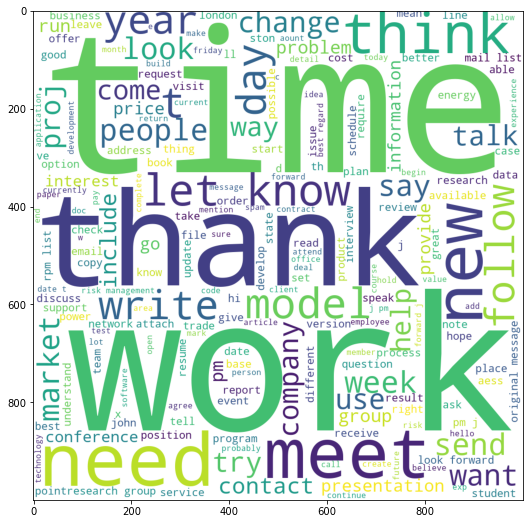

In [93]:
not_spam = wc.generate(df[df.label==0]['text'].str.cat(sep=" "))
plt.figure(figsize=(15,9))
plt.imshow(not_spam)

# **Modelling**

In [94]:
X = df.text
y = df.label

In [164]:
from sklearn.model_selection import train_test_split
X_trian, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

- With 20 % Test size, Test Score was Horrible, After 30% got Slightly difference.

# **TF-IDF**

In [165]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_trian).toarray()
X_test_tfidf = tfidf.fit_transform(X_test).toarray()

In [204]:
## AS we know Naive_bayes is best for text classification 
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import  confusion_matrix, recall_score, precision_score,accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import KFold, cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV

models = [('GaussianNB',GaussianNB()), ('BernoulliNB',BernoulliNB()), ('MultinomialNB', MultinomialNB()), ('RadomForestClassifier', RandomForestClassifier()),('Decision Tree',DecisionTreeClassifier()), ("KNN",KNeighborsClassifier()),('SVC', SVC()),('LogisticRegression', LogisticRegression()),("Ada Boost Classifier", AdaBoostClassifier()),('ExtraTreesClassifier',ExtraTreesClassifier()),("GradientBoostingClassifier", GradientBoostingClassifier()),('EXboost Classifier', XGBClassifier())]

- **Rough Testing**

In [246]:
Precision_Score = []
Recall_Score = []
Accuracy_Score =[]
models_names = []
F1_score = []

for name, model in models:
    model.fit(X_train_tfidf, y_train)
    y_pred=model.predict(X_test_tfidf)

    models_names.append(name)
    Recall_Score.append(recall_score(y_pred, y_test))
    Precision_Score.append(precision_score(y_pred, y_test))
    Accuracy_Score.append(accuracy_score(y_pred, y_test))
    F1_score.append(f1_score(y_pred, y_test))

dic = {'Algorithms Names':models_names,'Precision Score':Precision_Score, 'Recall Score':Recall_Score, 'F1 Score': F1_score, "Accuracy Score":Accuracy_Score}
dataframe = pd.DataFrame(data=dic)

c:\Users\Abu Ubaida\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:01:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [247]:
dataframe.sort_values(by=['Precision Score', 'Recall Score'], ascending = False)

,Algorithms Names,Precision Score,Recall Score,F1 Score,Accuracy Score
5,KNN,0.998054,0.476766,0.645283,0.476323
9,ExtraTreesClassifier,0.805447,0.539062,0.645866,0.578459
8,Ada Boost Classifier,0.795720,0.552703,0.652313,0.595172
3,RadomForestClassifier,0.714008,0.531114,0.609129,0.562674
10,GradientBoostingClassifier,0.667315,0.456724,0.542292,0.462396
4,Decision Tree,0.655642,0.460383,0.540931,0.468895
11,EXboost Classifier,0.564202,0.519713,0.541045,0.543175
1,BernoulliNB,0.474708,0.587952,0.525296,0.590529
2,MultinomialNB,0.447471,0.533643,0.486772,0.549675
0,GaussianNB,0.387160,0.448198,0.415449,0.480037


## Let's See Over Fitness and Under fitness 

In [202]:
Validation_Score= []
Accuracy_Score =[]
models_names = []
Overfit = []

for name, model in models:
    model.fit(X_train_tfidf, y_train)
    y_pred=model.predict(X_train_tfidf)

    models_names.append(name)
    Ac_score = accuracy_score(y_pred, y_train)
    
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    val_score= np.mean(cross_val_score(model, X_train_tfidf, y_train, cv=cv, n_jobs=-1, scoring='accuracy' ))
    
    Overfit.append(['Not Overfit' if Ac_score>val_score else 'overfit'])
    Accuracy_Score.append(Ac_score)
    Validation_Score.append(val_score)


dic = {'Algorithms Names':models_names,"Accuracy Score":Accuracy_Score, 'Validation Score':Validation_Score, "over fitness": Overfit}
dataframe_train = pd.DataFrame(data=dic)

c:\Users\Abu Ubaida\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:33:11] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [203]:
dataframe_train

,Algorithms Names,Accuracy Score,Validation Score,over fitness
0,GaussianNB,0.993631,0.926089,[Not Overfit]
1,BernoulliNB,0.965764,0.950371,[Not Overfit]
2,MultinomialNB,0.982882,0.965501,[Not Overfit]
3,RadomForestClassifier,0.999602,0.958995,[Not Overfit]
4,Decision Tree,0.999602,0.895039,[Not Overfit]
5,KNN,0.657245,0.739769,[overfit]
6,SVC,0.999204,0.972267,[Not Overfit]
7,LogisticRegression,0.990048,0.966428,[Not Overfit]
8,Ada Boost Classifier,0.951433,0.914148,[Not Overfit]
9,ExtraTreesClassifier,0.999602,0.962449,[Not Overfit]


- Results are not up to the mark, but there are some Algorithms which are performing better than other so let's tune them. 
**We know that Naive Bayes is best for textual data. regardless of bad performance I will Tune them as well**

# Tunning of Naive Bayes Algorithms

In [194]:
# will make a new Dataframe of Tunned models
names_of_model = []
Prec_score = []
acc_score = []
rec_score = []
f_score = []

In [177]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB, MultinomialNB
gnb = GaussianNB()
bnb = BernoulliNB()
cnb = ComplementNB()
mnb = MultinomialNB()
logic = LogisticRegression() 


#### **Logistic regression**

In [199]:
#let's tune logistic Regression, cause it is also import for text classification 

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
rand_cv = RandomizedSearchCV(estimator=LogisticRegression(),param_distributions=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [201]:
rand_cv.fit(X_train_tfidf, y_train)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
                   error_score=0, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   scoring='accuracy')

In [206]:
print(f'Train Accuracy : {rand_cv.best_estimator_.score(X_train_tfidf, y_train):.3f}')
print(f'Test Accuracy : {rand_cv.best_estimator_.score(X_test_tfidf, y_test):.3f}')
print(f'Best Accuracy Through Grid Search :{rand_cv.best_score_:.3f}')
print(f'Best Parameters : ',rand_cv.best_params_)

Train Accuracy : 0.998
Test Accuracy : 0.530
Best Accuracy Through Grid Search :0.973
Best Parameters :  {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}


In [207]:
logic = LogisticRegression(solver='lbfgs', penalty='l2', C=10) 
logic.fit(X_train_tfidf, y_train)

LogisticRegression(C=10)

In [208]:
y_pred = logic.predict(X_test_tfidf)
print(f'recall_score is = {recall_score(y_pred, y_test)}')
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'accuracy score is = {accuracy_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')

recall_score is = 0.5121212121212121
precision_score is = 0.32879377431906615
accuracy score is = 0.5301764159702879
confusion matrix
 [[402 345]
 [161 169]]


In [209]:
Prec_score.append(precision_score(y_pred, y_test))
rec_score.append(recall_score(y_pred, y_test))
names_of_model.append('LogisticRegression')
acc_score.append(accuracy_score(y_pred, y_test))
f_score.append(f1_score(y_pred, y_test))


**Almost same result, but precision Score increased slightly .** 

# **BernoulliNB**

In [188]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

bernoulli_nb_grid = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
bernoulli_nb_grid.fit(X_train_tfidf,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}, verbose=5)

In [210]:
print(f'Train Accuracy : {bernoulli_nb_grid.best_estimator_.score(X_train_tfidf, y_train):.3f}')
print(f'Test Accuracy : {bernoulli_nb_grid.best_estimator_.score(X_test_tfidf, y_test):.3f}')
print(f'Best Accuracy Through Grid Search :{bernoulli_nb_grid.best_score_:.3f}')
print(f'Best Parameters : ',bernoulli_nb_grid.best_params_)

Train Accuracy : 0.971
Test Accuracy : 0.556
Best Accuracy Through Grid Search :0.953
Best Parameters :  {'alpha': 0.01}


- let's train on these features

In [190]:
bnb = BernoulliNB(alpha=0.01)
bnb.fit(X_train_tfidf, y_train)

BernoulliNB(alpha=0.01)

In [211]:
y_pred = bnb.predict(X_train_tfidf)
print(f'recall_score is = {recall_score(y_pred, y_train)}')
print(f'precision_score is = {precision_score(y_pred, y_train)}')
print(f'accuracy score is = {accuracy_score(y_pred, y_train)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_train)}', end='\n')

recall_score is = 0.9839486356340289
precision_score is = 0.9578125
accuracy score is = 0.9705414012738853
confusion matrix
 [[1212   54]
 [  20 1226]]


In [212]:
y_pred = bnb.predict(X_test_tfidf)
print(f'recall_score is = {recall_score(y_pred, y_test)}')
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'accuracy score is = {accuracy_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')

recall_score is = 0.55
precision_score is = 0.3852140077821012
accuracy score is = 0.5561745589600743
confusion matrix
 [[401 316]
 [162 198]]


In [213]:
Prec_score.append(precision_score(y_pred, y_test))
rec_score.append(recall_score(y_pred, y_test))
names_of_model.append('Bernoulli NB')
acc_score.append(accuracy_score(y_pred, y_test))
f_score.append(f1_score(y_pred, y_test))


**not good affects by tunning :(**

# **GaussianNB**

In [193]:
gnb = GaussianNB()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=gnb,param_grid=params_NB,cv=cv,verbose=1,scoring='accuracy') 
gs_NB.fit(X_train_tfidf, y_train)



Fitting 15 folds for each of 100 candidates, totalling 1500 fits


{'var_smoothing': 0.01}

In [214]:
print(f'Train Accuracy : {gs_NB.best_estimator_.score(X_train_tfidf, y_train):.3f}')
print(f'Test Accuracy : {gs_NB.best_estimator_.score(X_test_tfidf, y_test):.3f}')
print(f'Best Accuracy Through Grid Search :{gs_NB.best_score_:.3f}')
print(f'Best Parameters : ',gs_NB.best_params_)

Train Accuracy : 0.988
Test Accuracy : 0.531
Best Accuracy Through Grid Search :0.947
Best Parameters :  {'var_smoothing': 0.01}


In [218]:
gnb = GaussianNB(var_smoothing= 0.01)
gnb.fit(X_train_tfidf, y_train)

GaussianNB(var_smoothing=0.01)

In [219]:
y_pred = gnb.predict(X_test_tfidf)
print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')

Accuracy Score is 0.531104921077066
precision_score is = 0.4961089494163424
recall score is = 0.5089820359281437
confusion matrix
 [[317 259]
 [246 255]]


In [220]:
Prec_score.append(precision_score(y_pred, y_test))
rec_score.append(recall_score(y_pred, y_test))
names_of_model.append('Gaussian NB')
acc_score.append(accuracy_score(y_pred, y_test))
f_score.append(f1_score(y_pred, y_test))


# **Complement NB** 

In [221]:
cnb = ComplementNB()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

params_NB = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
cnb_NB = GridSearchCV(estimator=cnb,param_grid=params_NB,cv=cv,verbose=1,scoring='accuracy') 
cnb_NB.fit(X_train_tfidf, y_train)



Fitting 15 folds for each of 5 candidates, totalling 75 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=ComplementNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]},
             scoring='accuracy', verbose=1)

In [222]:
print(f'Train Accuracy : {cnb_NB.best_estimator_.score(X_train_tfidf, y_train):.3f}')
print(f'Test Accuracy : {cnb_NB.best_estimator_.score(X_test_tfidf, y_test):.3f}')
print(f'Best Accuracy Through Grid Search :{cnb_NB.best_score_:.3f}')
print(f'Best Parameters : ',cnb_NB.best_params_)

Train Accuracy : 0.985
Test Accuracy : 0.551
Best Accuracy Through Grid Search :0.967
Best Parameters :  {'alpha': 0.5}


In [225]:
cnb = ComplementNB(alpha=1.0)
cnb.fit(X_train_tfidf, y_train)

ComplementNB()

In [226]:
y_pred = cnb.predict(X_test_tfidf)
print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')

Accuracy Score is 0.5487465181058496
precision_score is = 0.43190661478599224
recall score is = 0.5336538461538461
confusion matrix
 [[369 292]
 [194 222]]


In [227]:
Prec_score.append(precision_score(y_pred, y_test))
rec_score.append(recall_score(y_pred, y_test))
names_of_model.append('Complement NB')
acc_score.append(accuracy_score(y_pred, y_test))
f_score.append(f1_score(y_pred, y_test))


# **Multinomial NB**

In [228]:
mnb = MultinomialNB()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

params_NB = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
mnb_NB = GridSearchCV(estimator=mnb,param_grid=params_NB,cv=cv,verbose=1,scoring='accuracy') 
mnb_NB.fit(X_train_tfidf, y_train)



Fitting 15 folds for each of 5 candidates, totalling 75 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]},
             scoring='accuracy', verbose=1)

In [229]:
print(f'Train Accuracy : {mnb_NB.best_estimator_.score(X_train_tfidf, y_train):.3f}')
print(f'Test Accuracy : {mnb_NB.best_estimator_.score(X_test_tfidf, y_test):.3f}')
print(f'Best Accuracy Through Grid Search :{mnb_NB.best_score_:.3f}')
print(f'Best Parameters : ',mnb_NB.best_params_)

Train Accuracy : 0.985
Test Accuracy : 0.554
Best Accuracy Through Grid Search :0.968
Best Parameters :  {'alpha': 0.5}


In [230]:
mnb = MultinomialNB(alpha=1.0)
mnb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [231]:
y_pred = mnb.predict(X_test_tfidf)
print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')

Accuracy Score is 0.5496750232126276
precision_score is = 0.4474708171206226
recall score is = 0.5336426914153132
confusion matrix
 [[362 284]
 [201 230]]


In [232]:
Prec_score.append(precision_score(y_pred, y_test))
rec_score.append(recall_score(y_pred, y_test))
names_of_model.append('Multinomial NB')
acc_score.append(accuracy_score(y_pred, y_test))
f_score.append(f1_score(y_pred, y_test))


In [234]:
dic = {'Algorithms':names_of_model, 'Precision Score':Prec_score, 'Recall_Score':rec_score, 'Accuracy Score':acc_score, 'F1_score':f_score}
dataframe_tune = pd.DataFrame(data=dic)

## **Comparison, before tunning and after tunning** 

In [252]:
dataframe_tune.sort_values(by=['Precision Score'], ascending=False)

,Algorithms,Precision Score,Recall_Score,Accuracy Score,F1_score
3,Gaussian NB,0.496109,0.508982,0.531105,0.502463
5,Multinomial NB,0.447471,0.533643,0.549675,0.486772
4,Complement NB,0.431907,0.533654,0.548747,0.477419
2,Bernoulli NB,0.385214,0.550000,0.556175,0.453089
1,LogisticRegression,0.328794,0.512121,0.530176,0.400474


In [259]:
dataframe.sort_values(by=['Precision Score', 'Recall Score'], ascending=False).drop(index=5) # dropping KNN

,Algorithms Names,Precision Score,Recall Score,F1 Score,Accuracy Score
9,ExtraTreesClassifier,0.805447,0.539062,0.645866,0.578459
8,Ada Boost Classifier,0.795720,0.552703,0.652313,0.595172
3,RadomForestClassifier,0.714008,0.531114,0.609129,0.562674
10,GradientBoostingClassifier,0.667315,0.456724,0.542292,0.462396
4,Decision Tree,0.655642,0.460383,0.540931,0.468895
11,EXboost Classifier,0.564202,0.519713,0.541045,0.543175
1,BernoulliNB,0.474708,0.587952,0.525296,0.590529
2,MultinomialNB,0.447471,0.533643,0.486772,0.549675
0,GaussianNB,0.387160,0.448198,0.415449,0.480037
7,LogisticRegression,0.260700,0.531746,0.349869,0.537604


## **Extra Tree**

In [299]:
ET = ExtraTreesClassifier(n_estimators=1000 )
ET.fit(X_train_tfidf, y_train)

ExtraTreesClassifier(n_estimators=1000)

In [300]:
y_pred = ET.predict(X_test_tfidf)

print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'F1 Score  = {f1_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')

Accuracy Score is 0.5831012070566388
precision_score is = 0.8151750972762646
recall score is = 0.5420439844760673
F1 Score  = 0.6511266511266512
confusion matrix
 [[209  95]
 [354 419]]


# **Voting Classifier**


In [305]:
# will make a new Dataframe of voting Classifier
names_of_model_vc = []
Prec_score_vc = []
acc_score_vc = []
rec_score_vc = []
f_score_vc = []

- Combination of ExtraTreesClassifier and RandomForestClassifier

In [289]:
from sklearn.ensemble import VotingClassifier
estimators = [('RandomForestClassifer', RandomForestClassifier()),('ExtraTreesClassifier', ExtraTreesClassifier())]
ext_rand_vc= VotingClassifier(estimators=estimators, n_jobs=-1, verbose=1)

In [290]:
ext_rand_vc.fit(X_train_tfidf, y_train)

VotingClassifier(estimators=[('RandomForestClassifer',
                              RandomForestClassifier()),
                             ('ExtraTreesClassifier', ExtraTreesClassifier())],
                 n_jobs=-1, verbose=1)

In [301]:
y_pred = ext_rand_vc.predict(X_test_tfidf)
print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')


Accuracy Score is 0.5598885793871866
precision_score is = 0.7101167315175098
recall score is = 0.5289855072463768
confusion matrix
 [[238 149]
 [325 365]]


In [306]:
Prec_score_vc.append(precision_score(y_pred, y_test))
rec_score_vc.append(recall_score(y_pred, y_test))
names_of_model_vc.append('Extra Tree & Random Forest')
acc_score_vc.append(accuracy_score(y_pred, y_test))
f_score_vc.append(f1_score(y_pred, y_test))

- Combination of ExtraTreesClassifier and AdaBoostClassifier

In [308]:
from sklearn.ensemble import VotingClassifier
estimators = [('AdaBoostClassifier', AdaBoostClassifier()),('ExtraTreesClassifier', ExtraTreesClassifier())]
ext_ada_vc= VotingClassifier(estimators=estimators, n_jobs=-1, verbose=1)

In [309]:
ext_ada_vc.fit(X_train_tfidf, y_train)

VotingClassifier(estimators=[('AdaBoostClassifier', AdaBoostClassifier()),
                             ('ExtraTreesClassifier', ExtraTreesClassifier())],
                 n_jobs=-1, verbose=1)

In [310]:
y_pred = ext_ada_vc.predict(X_test_tfidf)
print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')


Accuracy Score is 0.6220984215413184
precision_score is = 0.7062256809338522
recall score is = 0.5864297253634895
confusion matrix
 [[307 151]
 [256 363]]


In [311]:
Prec_score_vc.append(precision_score(y_pred, y_test))
rec_score_vc.append(recall_score(y_pred, y_test))
names_of_model_vc.append('Extra Tree & Ada boost')
acc_score_vc.append(accuracy_score(y_pred, y_test))
f_score_vc.append(f1_score(y_pred, y_test))

- Combination of Bernoulli, multinomial, and complement 

In [312]:
from sklearn.ensemble import VotingClassifier
estimators = [('bnb',BernoulliNB(alpha=1.0)), ('mnb', MultinomialNB(alpha=1.0)), ('cnb',ComplementNB(alpha=1.0))]
vcNB= VotingClassifier(estimators=estimators, n_jobs=-1, verbose=1)

In [313]:
vcNB.fit(X_train_tfidf, y_train)

y_pred = vcNB.predict(X_test_tfidf)
print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')

Accuracy Score is 0.5506035283194057
precision_score is = 0.4377431906614786
recall score is = 0.5357142857142857
confusion matrix
 [[368 289]
 [195 225]]


In [314]:
Prec_score_vc.append(precision_score(y_pred, y_test))
rec_score_vc.append(recall_score(y_pred, y_test))
names_of_model_vc.append('Bernoulli, multinomial, and complement')
acc_score_vc.append(accuracy_score(y_pred, y_test))
f_score_vc.append(f1_score(y_pred, y_test))

- combination of Gaussian, Bernoulli, and logistic Reg

In [315]:
from sklearn.ensemble import VotingClassifier
estimators = [('gnb',GaussianNB(var_smoothing=0.01873817422860384)), ('bnb',BernoulliNB(alpha=1.0)), ('logic',LogisticRegression(solver='lbfgs', penalty='l2', C=10) )]
vc0 = VotingClassifier(estimators=estimators, n_jobs=-1, verbose=1)

In [316]:
vc0.fit(X_train_tfidf, y_train)

y_pred = vc0.predict(X_test_tfidf)
print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')

# when data was 20% splitted, overfitted  these were the scores
# This is the score of fist one
# - Accuracy Score is 0.7717454757734968
# - precision_score is = 0.049786628733997154
# - recall score is = 0.2348993288590604
# - confusion matrix
# -   [[2609  668]
# -    [ 114   35]]

# before balancing 
# Accuracy Score is 0.7901342673671921
# precision_score is = 0.07571428571428572
# recall score is = 0.424
# confusion matrix
#  [[2654  647]
#  [  72   53]]

Accuracy Score is 0.5552460538532962
precision_score is = 0.44163424124513617
recall score is = 0.5417661097852029
confusion matrix
 [[371 287]
 [192 227]]


In [317]:
Prec_score_vc.append(precision_score(y_pred, y_test))
rec_score_vc.append(recall_score(y_pred, y_test))
names_of_model_vc.append('Bernoulli, Gaussian, and Logistic Reg')
acc_score_vc.append(accuracy_score(y_pred, y_test))
f_score_vc.append(f1_score(y_pred, y_test))

- combination of Bernoulli and LogisticRegression

In [318]:
from sklearn.ensemble import VotingClassifier
estimators = [ ('bnb',BernoulliNB(alpha=1)), ('logic',LogisticRegression(solver='lbfgs', penalty='l2', C=10))]
vc1 = VotingClassifier(estimators=estimators, n_jobs=-1, verbose=1)

In [319]:
vc1.fit(X_train_tfidf, y_train)


y_pred = vc1.predict(X_test_tfidf)
print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')

# when data was 20% splitted, this was the result or when it was overfitted
# Accuracy Score is 0.7772913018096906
# precision_score is = 0.017069701280227598
# recall score is = 0.14285714285714285
# confusion matrix
#  [[2651  691]
#  [  72   12]]

# before balancing 
# Accuracy Score is 0.8012259194395797
# precision_score is = 0.05142857142857143
# recall score is = 0.6792452830188679
# confusion matrix
#  [[2709  664]
#  [  17   36]]


Accuracy Score is 0.5506035283194057
precision_score is = 0.23735408560311283
recall score is = 0.5700934579439252
confusion matrix
 [[471 392]
 [ 92 122]]


In [320]:
Prec_score_vc.append(precision_score(y_pred, y_test))
rec_score_vc.append(recall_score(y_pred, y_test))
names_of_model_vc.append('Bernoulli, and Logistic Reg')
acc_score_vc.append(accuracy_score(y_pred, y_test))
f_score_vc.append(f1_score(y_pred, y_test))

- combination of GaussianNB and LogisticRegression


In [321]:
from sklearn.ensemble import VotingClassifier
estimators = [('gnb',GaussianNB(var_smoothing=0.01873817422860384)), ('logic',LogisticRegression(solver='lbfgs', penalty='l2', C=10) )]
vc2 = VotingClassifier(estimators=estimators, n_jobs=-1, verbose=1)

In [322]:
vc2.fit(X_train_tfidf, y_train)


y_pred = vc2.predict(X_test_tfidf)
print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')


# when data was 20% splitted, Unbalanced and overfitted this was the result
# Accuracy Score is 0.7828371278458844
# precision_score is = 0.01991465149359886
# recall score is = 0.2028985507246377
# confusion matrix
#  [[2668  689]
#  [  55   14]]

Accuracy Score is 0.5403899721448467
precision_score is = 0.3035019455252918
recall score is = 0.5324232081911263
confusion matrix
 [[426 358]
 [137 156]]


In [323]:
Prec_score_vc.append(precision_score(y_pred, y_test))
rec_score_vc.append(recall_score(y_pred, y_test))
names_of_model_vc.append('Gaussian and Logistic Reg')
acc_score_vc.append(accuracy_score(y_pred, y_test))
f_score_vc.append(f1_score(y_pred, y_test))

- Combination of GaussianNB and BernoulliNB

In [324]:
from sklearn.ensemble import VotingClassifier
estimators = [('gnb',GaussianNB(var_smoothing=0.01873817422860384)), ('bnb',BernoulliNB(alpha=1.0))]
vc3 = VotingClassifier(estimators=estimators, n_jobs=-1, verbose=1)

In [325]:
vc3.fit(X_train_tfidf, y_train)

y_pred = vc3.predict(X_test_tfidf)
print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')


# when data was 20% splitted, Unbalanced and overfitted this was the result
# Accuracy Score is 0.7831290134267367
# precision_score is = 0.02702702702702703
# recall score is = 0.24358974358974358
# confusion matrix
#  [[2664  684]
#  [  59   19]]

Accuracy Score is 0.5728876508820798
precision_score is = 0.34824902723735407
recall score is = 0.5888157894736842
confusion matrix
 [[438 335]
 [125 179]]


In [326]:
Prec_score_vc.append(precision_score(y_pred, y_test))
rec_score_vc.append(recall_score(y_pred, y_test))
names_of_model_vc.append('Bernoulli, Gaussian')
acc_score_vc.append(accuracy_score(y_pred, y_test))
f_score_vc.append(f1_score(y_pred, y_test))

In [332]:
dictionary = {'Algorithms':names_of_model_vc, 'Precision Score':Prec_score_vc, 'Recall Score': rec_score_vc, 'F1 Score': f_score_vc, 'Accuracy Score': acc_score_vc}
dataframe_vc = pd.DataFrame(data=dictionary)


# **Finally**
#### *let's see everything*

- Here first I checked the Over fitting of Algorithms

In [334]:
dataframe_train

,Algorithms Names,Accuracy Score,Validation Score,over fitness
0,GaussianNB,0.993631,0.926089,[Not Overfit]
1,BernoulliNB,0.965764,0.950371,[Not Overfit]
2,MultinomialNB,0.982882,0.965501,[Not Overfit]
3,RadomForestClassifier,0.999602,0.958995,[Not Overfit]
4,Decision Tree,0.999602,0.895039,[Not Overfit]
5,KNN,0.657245,0.739769,[overfit]
6,SVC,0.999204,0.972267,[Not Overfit]
7,LogisticRegression,0.990048,0.966428,[Not Overfit]
8,Ada Boost Classifier,0.951433,0.914148,[Not Overfit]
9,ExtraTreesClassifier,0.999602,0.962449,[Not Overfit]


- These are the Rough Estimations on Default parameters

In [340]:
dataframe.sort_values(by='Precision Score', ascending=False).drop(index=5) # KNN is overfitted

,Algorithms Names,Precision Score,Recall Score,F1 Score,Accuracy Score
9,ExtraTreesClassifier,0.805447,0.539062,0.645866,0.578459
8,Ada Boost Classifier,0.795720,0.552703,0.652313,0.595172
3,RadomForestClassifier,0.714008,0.531114,0.609129,0.562674
10,GradientBoostingClassifier,0.667315,0.456724,0.542292,0.462396
4,Decision Tree,0.655642,0.460383,0.540931,0.468895
11,EXboost Classifier,0.564202,0.519713,0.541045,0.543175
1,BernoulliNB,0.474708,0.587952,0.525296,0.590529
2,MultinomialNB,0.447471,0.533643,0.486772,0.549675
0,GaussianNB,0.387160,0.448198,0.415449,0.480037
7,LogisticRegression,0.260700,0.531746,0.349869,0.537604


- As It is said, Naive Bayes and Logistic Reg are best for text classification. I tuned them for better result, but didn't accomplished

In [336]:
dataframe_tune

,Algorithms,Precision Score,Recall_Score,Accuracy Score,F1_score
1,LogisticRegression,0.328794,0.512121,0.530176,0.400474
2,Bernoulli NB,0.385214,0.550000,0.556175,0.453089
3,Gaussian NB,0.496109,0.508982,0.531105,0.502463
4,Complement NB,0.431907,0.533654,0.548747,0.477419
5,Multinomial NB,0.447471,0.533643,0.549675,0.486772


- **Then I tunned Extra Tree, and got better result, in terms of Precision and Recall Score** 
- Accuracy Score is 0.5831012070566388
- precision_score is = 0.8151750972762646
- recall score is = 0.5420439844760673
- F1 Score  = 0.6511266511266512
- confusion matrix
- [[209  95]
- [354 419]]

- Then I tried Voting Classification for getting better result, but overall it was not up to the mark!

In [379]:
dataframe_vc.sort_values(by="Precision Score", ascending=False)

,Algorithms,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Extra Tree & Random Forest,0.710117,0.528986,0.606312,0.559889
1,Extra Tree & Ada boost,0.706226,0.586430,0.640777,0.622098
3,"Bernoulli, Gaussian, and Logistic Reg",0.441634,0.541766,0.486602,0.555246
2,"Bernoulli, multinomial, and complement",0.437743,0.535714,0.481799,0.550604
6,"Bernoulli, Gaussian",0.348249,0.588816,0.437653,0.572888
5,Gaussian and Logistic Reg,0.303502,0.532423,0.386617,0.540390
4,"Bernoulli, and Logistic Reg",0.237354,0.570093,0.335165,0.550604


#### ***After every possible trial, I will use Extra Tree as my model.***

**Reasons:**
- It has high Precision Score than anyone
- It has good Recall Score as well, with nice f1_score, and Accuracy Score.


#### **Testing**

In [341]:
test = str(df1.text.sample())

## **Text Purification Function**

In [390]:
import re
import string 
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.parsing.preprocessing import remove_stopwords
wnl = WordNetLemmatizer()

def purification(text):
    #converting to lower case
    text = text.lower()

    # removing html tags
    pattern_html = re.compile('<.*?>')
    text=pattern_html.sub(" ", text) 

    #removing urls
    pattern_urls = re.compile('https?://\S +|www\.\S+')
    text = pattern_urls.sub(' ', text)

    #removing punctuations
    for i in string.punctuation:
        text = text.replace(i, "")
    
    #rectifying Spelling mistakes
    text = TextBlob(text).correct()

    #lemmatizing text
    words = word_tokenize(str(text)) ###
    lemm_string = []
    for word in words:
        lemm_string.append(wnl.lemmatize(word, pos='v'))
    text =  ' '.join(lemm_string)

    #removing Stop words
    text = remove_stopwords(text) 
    
    return text

### **Testing**

In [415]:
no=df1[df1.label==0].sample().index[0]
text = df1.text[no]
text

'update of cvsroot spamassassin spamassassin t in directory usw pr cvsNUMBER tmp cvs servNUMBER t modified files tag bNUMBER_NUMBER_NUMBER db_based_whitelist t db_based_whitelist_ips t log message fixed bug NUMBER r and w were not respecting auto_whitelist_path index db_based_whitelist t rcs file cvsroot spamassassin spamassassin t db_based_whitelist t v retrieving revision NUMBER NUMBER NUMBER NUMBER retrieving revision NUMBER NUMBER NUMBER NUMBER diff b w u d rNUMBER NUMBER NUMBER NUMBER rNUMBER NUMBER NUMBER NUMBER db_based_whitelist t NUMBER sep NUMBER NUMBER NUMBER NUMBER NUMBER NUMBER NUMBER NUMBER NUMBER db_based_whitelist t NUMBER oct NUMBER NUMBER NUMBER NUMBER NUMBER NUMBER NUMBER NUMBER NUMBER NUMBER NUMBER NUMBER NUMBER use lib use lib t use satest sa_t_init db_based_whitelist use test begin plan tests NUMBER use test begin plan tests NUMBER NUMBER NUMBER NUMBER NUMBER patterns is_nonspam_patterns scr_test_args m mail spamassassin dbbasedaddrlist sarun remove addr from whit

In [416]:
text = purification(text)
text

'update cvsroot spamassassin spamassassin t directory cvsnumber tm vs servnumber t modify file tag bnumbernumbernumber dbbasedwhitelist t dbbasedwhitelistips t log message fix bug number r w respect autowhitelistpath index dbbasedwhitelist t ras file cvsroot spamassassin spamassassin t dbbasedwhitelist t v retrieve revision number number number number retrieve revision number number number number b w u d number number number number number number number number dbbasedwhitelist t number number number number number number number number number number dbbasedwhitelist t number oct number number number number number number number number number number number number number use limb use limb t use latest saint dbbasedwhitelist use test begin plan test number use test begin plan test number number number number number pattern isnonspampatterns scrtestargs m mail spamassassin dbbasedaddrlist run remove add whitelist whitelisttest curl patternsruncb ok run remove add whitelist whitelisttest curl p

In [417]:
text = tfidf.transform([text]).toarray()

value =ET.predict(text)[0]
if value!=0:
    print('Spam = 1')
else:
    print("Not Spam = 0")

Spam = 1


## ***Deployment***

In [377]:
import pickle
pickle.dump(purification, open("purification.pkl", 'wb'))
pickle.dump(tfidf, open('transformer.pkl', 'wb'))
pickle.dump(ET, open("model.pkl", 'wb'))